In [13]:
import numpy as np
#Funções aqui

#Linograma
def lino_h(M,N):
    result = []
    for I in range(-M//2, M//2):
        x = (2*np.pi*I)/M
        for J in range(-N//4+1, N//4 +1):
            y = ((2*np.pi*I)/M) * ((4*J)/N)
            par = [x,y]
            result.append(par)
    return result


256
512


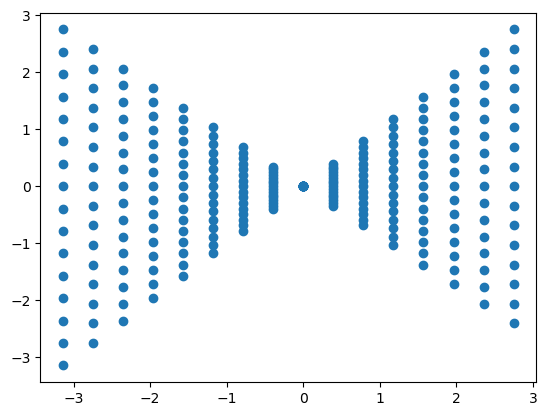

In [14]:
#Usando o linograma
M=16
N=32

pares_ordenados = lino_h(M,N)
import matplotlib.pyplot as plt

x_valores = [par[0] for par in pares_ordenados]
y_valores = [par[1] for par in pares_ordenados] 

plt.plot(x_valores, y_valores, marker='o', linestyle=' ')

x = lino_h(16,32)
print(len(x))
x = np.ravel(x)
print(len(x))


In [15]:
from pynfft.nfft import NFFT
import numpy as np
plan = NFFT([16, 16], 256)
print(plan.M)
print(plan.N)

#x = np.random.rand(32) + 1j *np.random.rand(32)
#m = 32#
#I = np.arange(m)
#x = (2 * np.pi * I) / m
x = lino_h(16,32)
x = np.ravel(x)

plan.x = x
plan.precompute()

#f_hat = np.zeros(256)
f_hat = np.random.rand(256) + 1j *np.random.rand(256)

plan.f_hat = f_hat
f = plan.trafo()
#f = np.sort(f)
print(f)


256
(16, 16)
[-8.69193597e-01           +nanj  5.47903272e+00           +nanj
  3.55416759e+00           +nanj  3.86771278e+00           +nanj
 -8.53857196e-01           +nanj  3.95270478e+00           +nanj
  5.23076272e+00           +nanj -1.57222617e+01           +nanj
  1.56423159e+00           +nanj  2.38804706e+00           +nanj
  2.36841097e+00           +nanj -1.11276766e+00           +nanj
 -1.52005627e+01           +nanj -3.98147214e+00           +nanj
 -1.09418448e-01           +nanj -6.82101431e+00           +nanj
 -3.85265004e+00+5.65230625e-01j -3.29932017e+00+4.06555148e-01j
 -8.07294061e-01+2.85482881e+00j -2.16429546e+00+3.33328830e+00j
  1.30043325e+00-4.52456276e+00j  3.17842032e-01+6.16952142e+00j
 -1.40693632e+00+3.00088560e+00j  7.63702903e+00-1.06478814e+01j
 -3.02410196e+00+4.53584038e+00j -5.09141616e+00+2.25074564e+00j
  1.64109221e+01+2.76740150e+01j -9.38964855e+00+6.23377997e+00j
 -9.74644470e+00-4.57445999e-01j  2.05883623e+01+2.90806119e+01j
 -9.31061449

In [16]:
def DTFT(x, xi, nu):
    m, n = x.shape
    x_result = np.zeros(len(xi), dtype=complex)
    for k in range(len(xi)):
        for i in range(m):
            for j in range(n):
                x_result[k] += x[i][j] * np.exp(-1j*(j*xi[k] + i*nu[k]))
    return x_result

#Aplicando a DTFT no domínio
print(DTFT(x, x_valores, y_valores))

ValueError: not enough values to unpack (expected 2, got 1)